# Helper Functions:))

In [6]:
import requests
import yfinance as yf
import pandas as pd
import re
import matplotlib.pyplot as plt

**Geting Stock Data with \<Company Name\> & \<Time Period of Interest\> -> for Stock Price Trend Visualisation**

In [3]:
def search_ticker_exact(dataframe, search_term):
    mask = (
        (dataframe['name'].str.lower() == search_term.lower()) |
        (dataframe['short_name'].str.lower() == search_term.lower()) |
        (dataframe['tiny_name'].str.lower() == search_term.lower())
    )
    return dataframe[mask]["ticker"].values[0] if not dataframe[mask].empty else ""


def get_stock_data(company_name, period):
    data = yf.Ticker(search_ticker_exact(df, company_name)).history(period=period)
    lst_date = data.index.tolist();
    lst_close = data["Close"].tolist();
    return pd.DataFrame({"date": lst_date, "close": lst_close})


df = pd.read_csv("us_symbols.csv") # list of correspoding Ticker given Company Name

get_stock_data("meta", "3mo")
# period must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

,date,close
0,2024-06-13 00:00:00-04:00,503.600006
1,2024-06-14 00:00:00-04:00,504.160004
2,2024-06-17 00:00:00-04:00,506.630005
3,2024-06-18 00:00:00-04:00,499.489990
4,2024-06-20 00:00:00-04:00,501.700012
...,...,...
59,2024-09-09 00:00:00-04:00,504.790009
60,2024-09-10 00:00:00-04:00,504.790009
61,2024-09-11 00:00:00-04:00,511.829987
62,2024-09-12 00:00:00-04:00,525.599976


**Extract RISK SCORE with RE**

In [7]:
text = "This model scored 7/10 for accuracy."

# for Displaying Risk Score
# returns String of the form "7/10" if found, else "No match found."
def get_risk_score(text):
    match = re.search(r'\b(?:10|[0-9])/10\b', text)
    if match:
        return match.group()
    else:
        return "No match found."

# for Pie Chart Plotting
# String of the form "7/10" -> 0.7
def risk_score_to_float(fraction):
    numerator, denominator = map(int, fraction.split('/'))
    floating_point_number = numerator / denominator
    return floating_point_number

print(get_risk_score(text)) # 7/10  
print(risk_score_to_float(get_risk_score(text))) # 7/10 -> 0.7

7/10
0.7


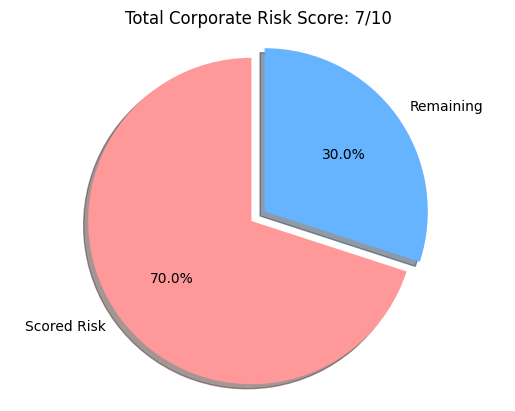

In [8]:
# Pie Chart Plotting
def plot_risk_score_pie(score_fraction):
    # Convert risk score (e.g., "7/10") to a fraction (0.7)
    score_float = risk_score_to_float(score_fraction)
    
    # Splitting data 
    labels = ['Scored Risk', 'Remaining']
    sizes = [score_float, 1 - score_float] 
    colors = ['#ff9999', '#66b3ff']  
    explode = (0.1, 0)  # Explode the first slice for emphasis
    
    # Plotting
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"Total Corporate Risk Score: {score_fraction}")
    plt.show()

# Running the extraction and plotting process
risk_score = get_risk_score(text)
if risk_score != "No match found.":
    plot_risk_score_pie(risk_score)
else:
    print("No valid risk score found.")